# Projet: Rendez-vous médicaux

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Préparation des données</a></li>
<li><a href="#eda">Analyse Exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Contexte

L'ensemble des données utilisé regroupe des informations sur environ 100 000 rendez-vous médicaux enregistrés au Brésil et s'intéresse principalement à la question de savoir si les patients se sont présentés ou non à leur rendez-vous comme prévu. Ces données ont été tirées de l'analyse décrite sur le site de [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

Pour chacun des rendez-vous médicaux enregistrés, les données exploitées renseignent entre autres sur le sexe du patient, sa date de rendez-vous prévue ainsi que la date d'enregistrement du rendez-vous, son age, son lieu de rendez-vous ainsi que d'autres paramètres médicaux et physiologiques (patient diabétique, alcoolique, hypertendu, handicapé, etc.). Enfin la source de données précise à chaque fois si le patient s'est présenté à son rendez-vous ou pas.

### Problématique

Pour un meilleur suivi des rendez-vous médicaux dans le futur, on aimerait bien savoir les principales raisons pour lesquelles les patients manquent leurs rendez-vous médicaux.

On se pose donc les questions suivantes :

- Quels sont les principaux paramètres des patients qui pourraient influencer sur le respect des dates de rendez-vous ?
- L'envoi des SMS aux patients est-il efficace ?
- Les patients bénéficiant des aides sociales (Bolsa Família) prennent-ils généralement au serieux leurs rendez-medicaux ?
- Les répartitions des rendez-vous médicaux dans la semaine ont-ils un impact sur les absences des patients ?
- Quelles sont les principales zones géographiques où les patients sont plus susceptibles de manquer leur rendez-vous médical ?

### Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Préparation des données

Dans cette section, nous allons charger nos données depuis le fichier source _medical_appointment_data.csv_. Par la suite, nous effectuer évaluer ces données et les nettoyer pour une meilleure manipulation et analyse plus tard.

### Chargement des données
Procédons dans un premier temps au chargement de notre fichier de données

In [2]:
# Chargement des données et affichage des 5 premières lignes

df = pd.read_csv('medical_appointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Évaluation de notre ensemble de données

Procédons à présent à l'évaluation de notre ensemble de données pour détecter d'éventuels problèmes sur ces dernières.

In [3]:
# Évaluation de la dimension des données

df.shape

(110527, 14)

Notre ensemble de données contient __110 527__ enregistrements répartis sur __14__ colonnes.

In [4]:
# Liste des colonnes

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Les 14 colonnes ont des noms qui ne sont pas uniformes et qui ne faciliteront pas la manipulation. Nous procéderons à leur renommage plus tard pour les transformer en minuscule et utiliser le séparateur _ pour les mots composés. Par ailleurs, certains noms sont mal libellés (_Hipertension, Handcap_)

In [5]:
# Types de données des colonnes

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Les colonnes relatives aux jours/heures des rendez-vous sont de type Chaines de caractères et devrons être transformées en Datetime pour une meilleure manipulation. Procédons à présent à une évaluation des contenus de nos différentes colonnes.

#### Description des données

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Les premières observations ci-après peuvent être faites sur les colonnes:
- La colonne âge présente à priori des valeurs aberrantes. Ces valeurs oscillent de __-1 an__ à __115 ans__. Il faudra effectuer une inspection détaillée de cette colonne
- La colonne __Handcap__ ne contient à priori pas des valeurs booléennes. La valeur maximale enregistrée est __4__. Il s'agit éventuellement d'une valeur aberrantes ou alors la colonne enregistre le nombre total d'handicaps d'un patient particulier.
- Les colonnes __Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received__ contiennent des valeurs booléennes (0, 1).

Pour la suite, un examen approfondi de certaines colonnes sera fait.

##### Valeurs des âges

In [7]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Plusieurs patients sont âgés de __0 et 1 ans__, il s'agit probalement de nouveaux nés et de nourrissons.
<br>
Par ailleurs, un seul patient est âgé de __-1 an__. Soit c'est une valeur aberrente, ou alors il s'agit d'une femme enceinte. De toutes les façons, cette donnée ne nous sera pas très utile et elle pourra être supprimée.

##### Valeurs de Handcap

In [8]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

Cette colonne contient jusqu'à 5 valeurs distinctes et ne renseigne pas assez sur son contenu. Elle pourra dont être supprimée

##### Valeurs de No-show

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

Cette colonne contient essentiellement les valeurs __Yes__ et __No__. Elle pourra être remplacée par une colonne booléenne pour plus de flexibilité

#### Analyse des valeurs dupliquées

In [10]:
# Identification du nombre de valeurs dupliquées dans notre ensemble de données

df.duplicated().sum()

0

À priori notre ensemble de données ne présente pas de valeurs dupliquées.
<br>
Nous allons effectuer une deuxième vérification en considérant cette fois les paramètres __PatientID et AppointmentDay__

In [11]:
df.duplicated(subset=['PatientId', 'AppointmentDay']).sum()
#df[].sort_values(by=['PatientId', 'AppointmentDay']).sample(40)

8719

Notre ensemble de données contient __8719__ qu'on peut considérer comme dupliquées et qu'on pourra supprimer.

#### Analyse des valeurs manquantes

In [12]:
# Identification du nombre de valeurs nulles par colonnes

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Aucune valeur nulle (manquante) n'est présente dans notre ensemble de données. Aucun traitement particulier n'est à faire.

#### Analyse des valeurs uniques

In [13]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Toutes les valeurs de numéro de rendez-vous __AppointmentID__ sont distinctes. Cette colonne ne nous apportera pas des informations utiles. Elle pourra être supprimée plus tard.
<br>
Le nombre de valeurs uniques dans la colonne __PatientId__ indique que des patients ont enregistrés plusieurs rendez-vous. Cela pourra être utile pour la suite des analyses.
<br>
La colonne __AppointmentDay__ indique que les données sont réparties sur __27__ jours distincts

### Nettoyage des données
Dans cette sections, nous allons procéder au nettoyage de notre ensemble de données en appliquant les remarques formulées à l'étape précédente (évaluation des données). Il s'agit de:
- Supprimer des colonnes
- Renommer les colonnes
- Modifier les types de données de colonnes
- Supprimer des valeurs aberrentes d'âge
- Supprimer les enregistrements dupliqués
- Rajouter une nouvelle colonne

##### Suppression de colonnes

In [14]:
# Dimensions initiales

df.shape

(110527, 14)

In [15]:
# Suppression des colonnes AppointmentID et Handcap
df.drop(columns=['AppointmentID', 'Handcap'], inplace=True)

df.shape

(110527, 12)

##### Renommage des colonnes

In [16]:
# Renommage de toutes les colonnes
# Rajout du separateur "_" entre les noms composés et correction d'orthographe
df.rename(columns={
    'PatientId': 'Patient_ID', 
    'AppointmentID': 'Appointment_ID', 
    'ScheduledDay': 'Scheduled_Day', 
    'AppointmentDay': 'Appointment_Day', 
    'Hipertension': 'Hypertension'}, inplace=True)

# Transformation des noms en minuscule
df.rename(columns=lambda c: c.lower(), inplace=True)

# Affichage des nouveaux noms
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'sms_received', 'no-show'],
      dtype='object')

La colonne __no-show__ n'a pas été touchée car un traitement particulier y sera fait

##### Modification des types de données

In [17]:
# Types de données actuels
df.dtypes

patient_id         float64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
sms_received         int64
no-show             object
dtype: object

In [18]:
# Transformation des dates en type Datetime
df.appointment_day = pd.to_datetime(df.appointment_day)
df.scheduled_day = pd.to_datetime(df.scheduled_day)
#df.scholarship = df.scholarship.astype(bool)
#df.hypertension = df.hypertension.astype(bool)
#df.diabetes = df.diabetes.astype(bool)
#df.alcoholism = df.alcoholism.astype(bool)
#df.sms_received = df.sms_received.astype(bool)

On se rassure à présent que les nouveaux types sont bons

In [19]:
df.dtypes

patient_id                     float64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
sms_received                     int64
no-show                         object
dtype: object

##### Suppression de valeurs aberrentes d'âge

In [20]:
# Suppression des lignes où l'âge est -1
df.drop(df[df.age == -1].index, inplace=True)

In [21]:
df.shape

(110526, 12)

##### Suppression des valeurs dupliquées

In [22]:
# Nombre initial de données
len(df)

110526

In [23]:
df.drop_duplicates(subset=['patient_id', 'appointment_day'], inplace=True)

# Nombre de données après suppression des valeurs dupliquées
len(df)

101807

##### Création de nouvelles colonnes

Création d'une nouvelle colonne nommée __no_show__ de type booléen où la valeur est __True__ lorsque la colonne __no-show__ est à __Yes__ et ensuite suppression de l'ancienne colonne __no-show__.

In [24]:
df['no_show'] = (df['no-show'] == 'Yes').astype(int)
df.drop(columns=['no-show'], inplace=True)

In [25]:
df.dtypes

patient_id                     float64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
sms_received                     int64
no_show                          int64
dtype: object

A ce stade, le nettoyage des données est terminé et nous pouvons désormais procéder à l'analyse exploratoire des données.

<a id='eda'></a>
## Analyse exploratoire des données

Dans cette section, nous allons répondre à chacune des questions posées à l'introduction en effectuant une analyse de notre ensemble de données.

<a id='q1'></a>
### Quels sont les principaux paramètres des patients qui pourraient influencer sur le respect des dates de rendez-vous ?

Afin de répondre à cette question, nous allons effectuer une étude de correlation entre le taux d'absentéisme aux rendez-vous et chacuns des paramètres du patient:
- [Âge](#q1_age)
- [Genre](#q1_gender)
- [Pathologies (diabétique et/ou hypertendu)](#q1_pathology)
- [Alcoolisme](#q1_alcohol)

In [26]:
# Création d'une fonction générique pour la personnalisation des libellés d'un graphe
def labelGraph(title, xlabel=None, ylabel=None, xorient='horizontal'):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xorient)

#### Analyse de la répartition des principaux paramètres

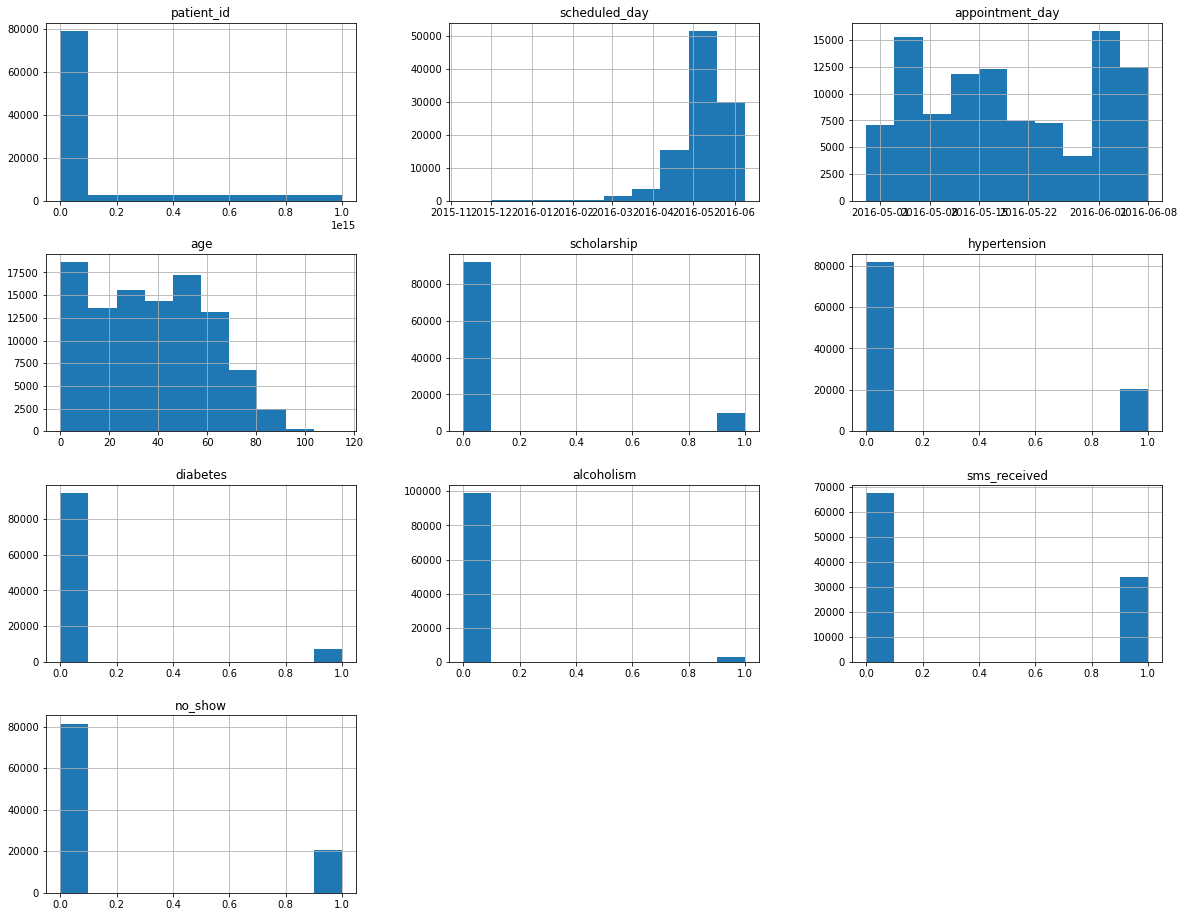

In [27]:
# Affichage de l'histogramme de toutes les variables quantitatives

df.hist(figsize=(20, 16));

Nous pouvons constater que :
- Les rendez-vous sont généralement pris en début et milieu de mois
- Le graphe des âges est légèrement incliné vers la droite. Des pics sont observés pour les nourrissons (autour de 0 ans) et les personnes âgées d'environ 30 ans et 50 ans ;
- Une petite portion de patients présentent un pathologie (diabète ou hypertension) ;
- Très peu de patients enregistrés bénéficient de l'aide sociale Bolsa Famìlia (Scholarship) ;
- Très peu de patients alcooliques enregistrés.

#### Exploration du paramètre no_show

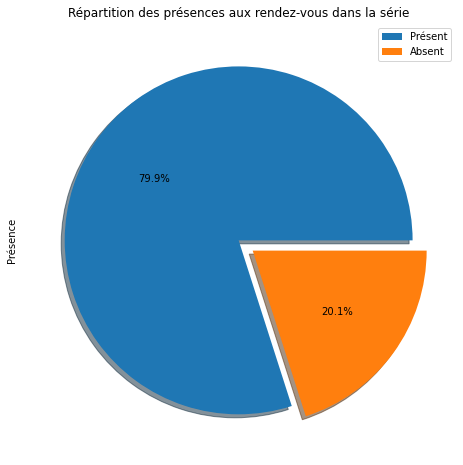

In [28]:
df.no_show.value_counts().plot(kind='pie',
                              figsize=(8, 8),
                              legend=True,
                              labels=['Présent', 'Absent'],
                              autopct='%1.1f%%',
                              explode=(0, 0.1),
                              labeldistance=None,
                              shadow=True);
labelGraph('Répartition des présences aux rendez-vous dans la série',
          ylabel='Présence');
#plt.ylabel('Présence')
#plt.title('Répartition des présences aux rendez-vous dans la série');

Jusqu'à __20.1%__ des enregistrements dans notre série correspond aux cas où les patients ne se sont pas pointé à leur rendez-vous.
<br> Pour la suite, nous allons effectuer des analyses de corrélations avec les principaux paramètre de notre étude.

#### Exploration du paramètre Age (boîte à moustache)

Nous allons procéder à une exploration détaillée du paramètre âge pour identifier d'éventuelles valeurs aberrantes.

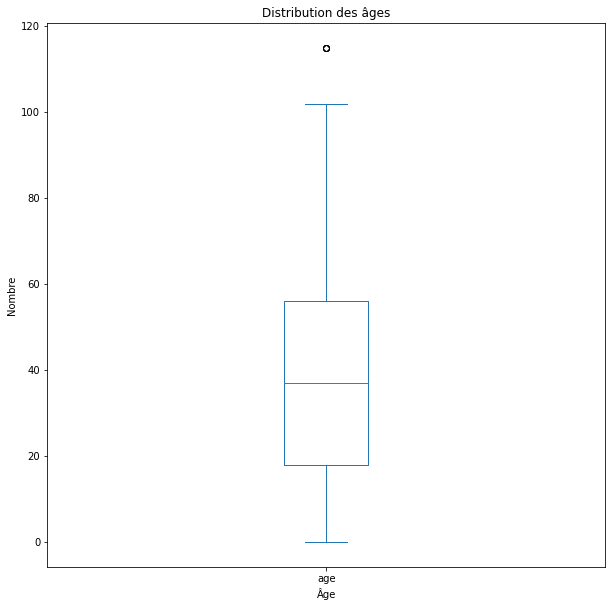

In [29]:
# Tracé du diagramme Boîte à moustache du paramètre Age

df.age.plot(kind='box', figsize=(10, 10));
labelGraph('Distribution des âges', 'Âge', 'Nombre');
#plt.title('Distribution des âges');
#plt.xlabel('Âge')
#plt.ylabel('Nombre');

Il ressort que le paramètre __Age__ est bien distribué malgré une petite quantité de valeurs considérées aberrantes au delà de __100 ans__.

<a id='q1_age'></a>
#### Correlation entre l'âge et le respect des rendez-vous
Tracé du nuage de points marquant la relation entre l'âge des patients et le fait qu'ils ont respecté ou non leur rendez-vous.

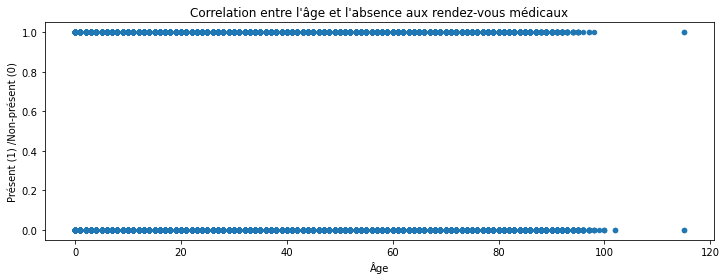

In [30]:
# Tracé du nuage de points

df.plot(kind='scatter', y='no_show', x='age', figsize=(12, 4));
labelGraph("Correlation entre l'âge et l'absence aux rendez-vous médicaux",
          'Âge',
          'Présent (1) /Non-présent (0)')
#plt.title('Correlation entre l\'âge et l\'absence aux rendez-vous médicaux');
#plt.xlabel('Âge')
#plt.ylabel('Présent (1) /Non-présent (0)');

Nous constatons qu'il n'existe pas de corrélation directe entre l'âge et le respect des rendez-vous médicaux. Il est impossible de prédire si un patient d'un certain âge pourra se présenter à son rendez-vous.
<br>
Nous allons maintenant procéder à une analyse beaucoup plus quantitative des âges en les répartissant en différents groupes.

##### Répartition des âges en groupes

In [31]:
# Exploration des valeurs significatives des âges

df.age.describe()

count    101807.000000
mean         37.059289
std          23.213906
min           0.000000
25%          18.000000
50%          37.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

Les âges peuvent être répartis en __3 groupes__ :
- Les _enfants_ de moins de __0__ à __18 ans__ (en dessous du 25e percentile)
- Les _adultes_ de __19__ à __56 ans__ (du 25e percentile au 75e percentile)
- Les _vieux_ de __57__ à __115 ans__ (au delà du 75e percentile)

In [32]:
# Définition des groupes 
bin_edges = [-1, 18, 56, 116]

In [33]:
# Libellés
bin_names = ['Enfant', 'Adulte', 'Vieux']

In [34]:
# Création d'une colonne pour les groupes d'âge
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [35]:
# Vérification de la création des colonnes
df.sample()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,age_group
95152,2.516783e+11,M,2016-06-07 11:00:08+00:00,2016-06-07 00:00:00+00:00,15,JARDIM DA PENHA,0,0,0,0,0,0,Enfant


Pour une analyse plus objective, nous allons évaluer le taux d'absence aux rendez-vous (moyenne des no_show = True sur le nombre total de rendez-vous) pour chaque groupe d'âge.

$$
Taux = 100 \times \frac{Count(Absent)}{Count(Present) + Count(Absent)}
$$

In [36]:
# Création d'une variable pour pouvoir filtrer plus rapidement les enregistrement où le patient s'est pointé

# Filtrer rapidement les lignes où le patient ne s'est pas présenté
no_show = df['no_show'] == 1

# Filtrer rapidement les lignes où le patient s'est présenté
show = df['no_show'] == 0

In [37]:
df_group = 100 * df[no_show].groupby('age_group').no_show.count() / df.groupby('age_group').no_show.count()
df_group

age_group
Enfant    21.528401
Adulte    21.479639
Vieux     15.408019
Name: no_show, dtype: float64

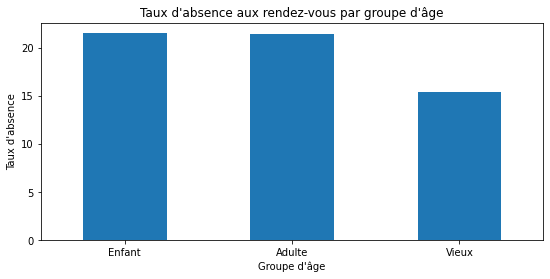

In [38]:
# Affichage du graphe y relatif
df_group.plot(kind='bar', figsize=(9, 4))
labelGraph("Taux d'absence aux rendez-vous par groupe d'âge",
          "Groupe d'âge",
          "Taux d'absence");
#plt.title('Taux d\'absence aux rendez-vous par groupe d\'âge');
#plt.xticks(rotation='horizontal')
#plt.xlabel('Groupe d\'âge')
#plt.ylabel('Taux d\'absence');

Il ressort que :
- __21.53%__ des rendez-vous pris pour les __Enfants__ ne sont souvent pas respectés
- __21.48%__ des rendez-vous pris par les __Adultes__ ne sont souvent pas respectés
- __15.41%__ des rendez-vous pris par les __Vieux__ ne sont pas souvent respectés

#### Exploration du paramètre Genre

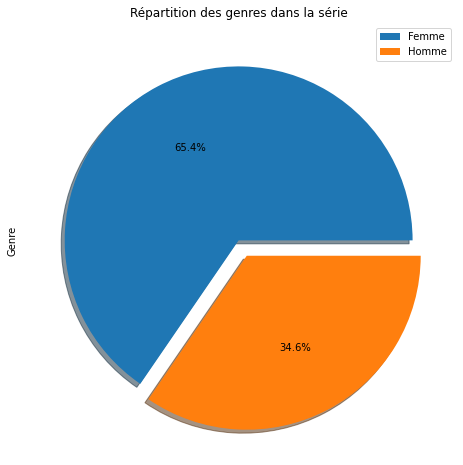

In [39]:
df.gender.value_counts().plot(kind='pie',
                              figsize=(8, 8),
                              legend=True,
                              labels=['Femme', 'Homme'],
                              autopct='%1.1f%%',
                              explode=(0, 0.1),
                              labeldistance=None,
                              shadow=True);
labelGraph('Répartition des genres dans la série',
          ylabel='Genre')
#plt.ylabel('Genre')
#plt.title('Répartition des genres dans la série');

__65.4%__ des patients dans notre série sont des femmes contre __34.6%__ d'hommes.

<a id='q1_gender'></a>
#### Corrélation entre le genre et les absences aux rendez-vous

Évaluation du taux d'absence aux rendez-vous (moyenne des no_show = True sur le nombre total de rendez-vous) pour chaque genre, comme précédemment avec les groupes d'âge.

In [40]:
df_group = 100 * df[no_show].groupby('gender').no_show.count() / df.groupby('gender').no_show.count()
df_group.rename({'F' : 'Femme', 'M' : 'Homme'}, inplace=True)
df_group

gender
Femme    20.194833
Homme    19.809015
Name: no_show, dtype: float64

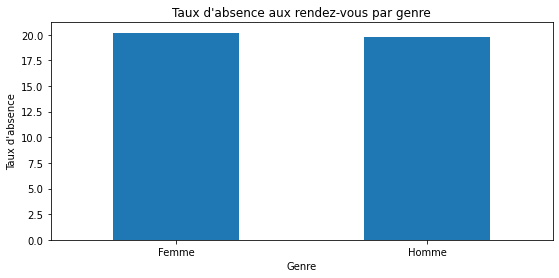

In [41]:
# Affichage du graphe y relatif
df_group.plot(kind='bar', figsize=(9, 4))
labelGraph("Taux d'absence aux rendez-vous par genre",
          'Genre',
          "Taux d'absence");
#plt.title('Taux d\'absence aux rendez-vous par genre');
#plt.xlabel('Genre')
#plt.xticks(rotation='horizontal')
#plt.ylabel('Taux d\'absence');

Il ressort que :
- __20.19%__ des rendez-vous pris par les __Femmes__ ne sont souvent pas respectés
- __19.81%__ des rendez-vous pris par les __Hommes__ ne sont souvent pas respectés

<a id='q1_pathology'></a>
#### Corrélation entre les pathologies et l'absence aux rendez-vous médicaux
Un patient sera considéré malade s'il présente au moins une pathologie (diabète ou hypertension).
Nous allons créer une nouvelle colonne booléenne qui sera __True__ si le patient est __diabétique ou hypertendu__ et False dans le cas contraire.

In [42]:
# Affichage du graphe relatif au nombre de personnes alcooliques
df['sick'] = ((df['diabetes'] == 1) | (df['hypertension'] == 1)).astype(int)

In [43]:
df.sample()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,age_group,sick
33643,5.514854e+10,F,2016-05-09 13:38:28+00:00,2016-05-11 00:00:00+00:00,45,FORTE SÃO JOÃO,0,0,0,0,0,0,Adulte,0


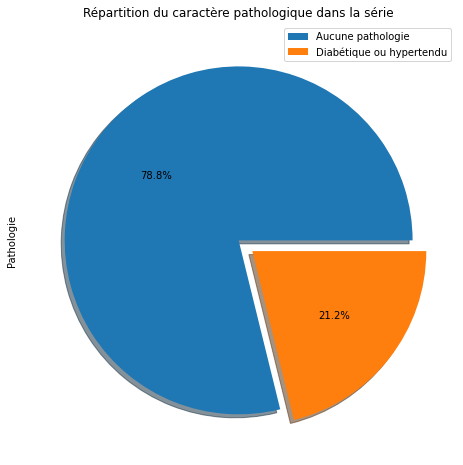

In [44]:
# Exploration du paramètre Pathologie
df.sick.value_counts().plot(kind='pie',
                              figsize=(8, 8),
                              legend=True,
                              labels=['Aucune pathologie', 'Diabétique ou hypertendu'],
                              autopct='%1.1f%%',
                              explode=(0, 0.1),
                              labeldistance=None,
                              shadow=True);
labelGraph('Répartition du caractère pathologique dans la série',
          ylabel='Pathologie')

__21.2%__ des patients dans notre série présentent une pathologie (diabète ou hypertension)

In [45]:
# Taux d'absence aux rendez-vous chez les personnes malades
df_group = 100 * df[no_show].groupby('sick').no_show.count() / df.groupby('sick').no_show.count()
df_group.rename({0 : 'Aucune pathologie', 1 : 'Diabétique ou hypertendu'}, inplace=True)
df_group

sick
Aucune pathologie           20.815788
Diabétique ou hypertendu    17.250824
Name: no_show, dtype: float64

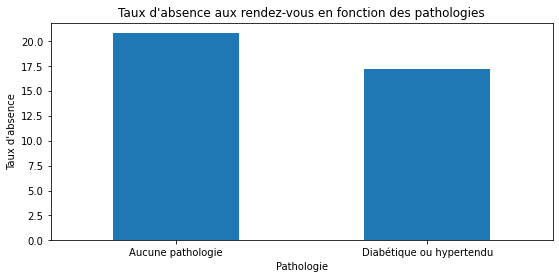

In [46]:
df_group.plot(kind='bar', figsize=(9, 4));
labelGraph("Taux d'absence aux rendez-vous en fonction des pathologies",
          'Pathologie',
          "Taux d'absence")

Il ressort que :
- __20.82%__ des rendez-vous pris par les personnes n'ayant __aucune pathologie__ ne sont souvent pas respectés
- __17.25%__ des rendez-vous pris par les personnes __malades__ ne sont souvent pas respectés

<a id='q1_alcohol'></a>
#### Corrélation entre l'alcoolisme et l'absence aux rendez-vous médicaux

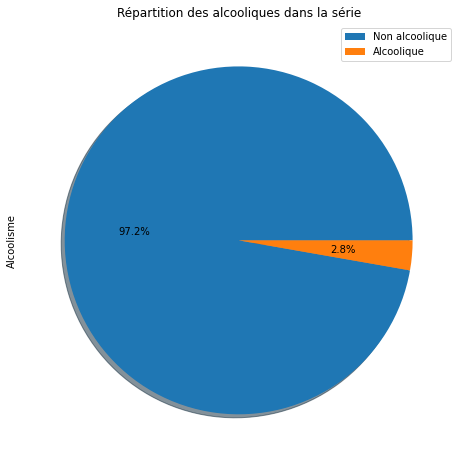

In [47]:
# Affichage du graphe relatif au nombre de personnes alcooliques
df.alcoholism.value_counts().plot(kind='pie',
                               figsize=(8, 8),
                               labels=['Non alcoolique', 'Alcoolique'],
                               legend=True,
                               autopct='%1.1f%%',
                               #explode=(0, 0.1),
                               labeldistance=None,
                               shadow=True);
labelGraph('Répartition des alcooliques dans la série',
          ylabel='Alcoolisme')
#plt.ylabel('Alcoolisme')
#plt.title('Répartition des alcooliques dans la série');

Seulement __2.8%__ des enregistrement correspondent aux patients ayant un problème d'alcoolisme.

In [48]:
# Taux d'absence aux rendez-vous chez les personnes alcooliques
df_group = 100 * df[no_show].groupby('alcoholism').no_show.count() / df.groupby('alcoholism').no_show.count()
df_group.rename({0 : 'Non alcoolique', 1 : 'Alcoolique'}, inplace=True)
df_group

alcoholism
Non alcoolique    20.020203
Alcoolique        21.514936
Name: no_show, dtype: float64

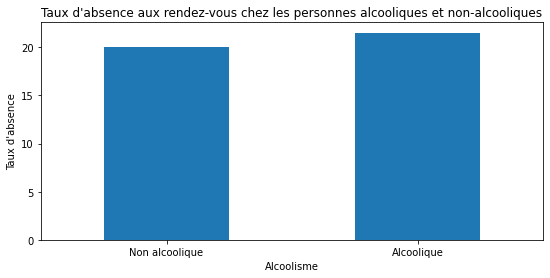

In [49]:
df_group.plot(kind='bar', figsize=(9, 4));
labelGraph("Taux d'absence aux rendez-vous chez les personnes alcooliques et non-alcooliques",
          'Alcoolisme',
          "Taux d'absence")
#plt.title('Taux d\'absence aux rendez-vous chez les personnes alcooliques et non-alcooliques');
#plt.xlabel('Alcoolisme')
#plt.xticks(rotation='horizontal')
#plt.ylabel('Taux d\'absence');

Il ressort que :
- __20.02%__ des rendez-vous pris par les personnes __non-alcooliques__ ne sont souvent pas respectés
- __21.51%__ des rendez-vous pris par les personnes __alcooliques__ ne sont souvent pas respectés

<a id='q2'></a>
### L'envoie des SMS aux patients est-il efficace ?
#### Corrélation entre la réceptions des SMS et l'absence aux rendez-vous médicaux

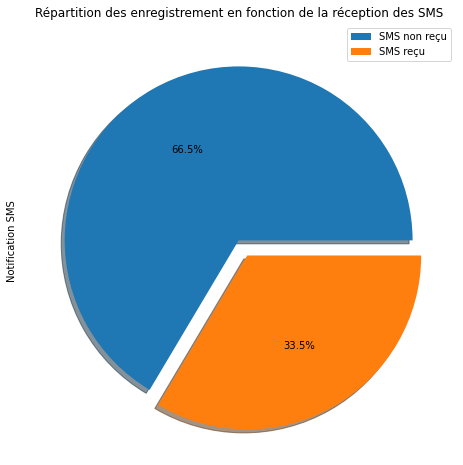

In [50]:
# Affichage du graphe relatif au nombre de récipiendaires des SMS
df.sms_received.value_counts().plot(kind='pie',
                               figsize=(8, 8),
                               labels=['SMS non reçu', 'SMS reçu'],
                               legend=True,
                               autopct='%1.1f%%',
                               explode=(0, 0.1),
                               labeldistance=None,
                               shadow=True);
labelGraph('Répartition des enregistrement en fonction de la réception des SMS',
          ylabel='Notification SMS')
#plt.ylabel('Notification SMS')
#plt.title('Répartition des enregistrement en fonction de la réception des SMS');

Jusqu'à __66.5%__ des enregistrement correspondent aux patients qui n'ont pas reçu des SMS.

In [51]:
# Taux d'absence aux rendez-vous en fonction de la réception des SMS
df_group = 100 * df[no_show].groupby('sms_received').no_show.count() / df.groupby('sms_received').no_show.count()
df_group.rename({0 : 'SMS non reçu', 1 : 'SMS reçu'}, inplace=True)
df_group

sms_received
SMS non reçu    16.369817
SMS reçu        27.374678
Name: no_show, dtype: float64

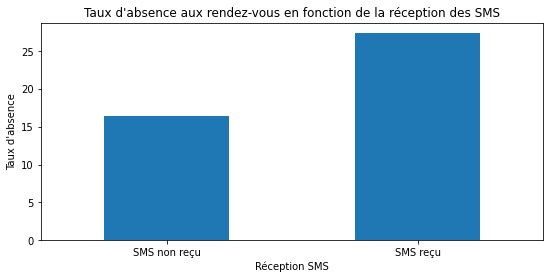

In [52]:
# Affichage du graphe y relatif
df_group.plot(kind='bar', figsize=(9, 4));
labelGraph("Taux d'absence aux rendez-vous en fonction de la réception des SMS",
          'Réception SMS',
          "Taux d'absence")
#plt.title('Taux d\'absence aux rendez-vous en fonction de la réception des SMS');
#plt.xlabel('SMS')
#plt.xticks(rotation='horizontal')
#plt.ylabel('Taux d\'absence');

Il ressort que :
- __16.37%__ des rendez-vous pris par les personnes __n'ayant pas reçu un SMS__ ne sont souvent pas respectés
- __27.37%__ des rendez-vous pris par les personnes __ayant reçu un SMS__ ne sont souvent pas respectés

<a id='q3'></a>
### Les patients bénéficiant des aides sociales (Bolsa Família) prennent-ils généralement au serieux leurs rendez-medicaux ?

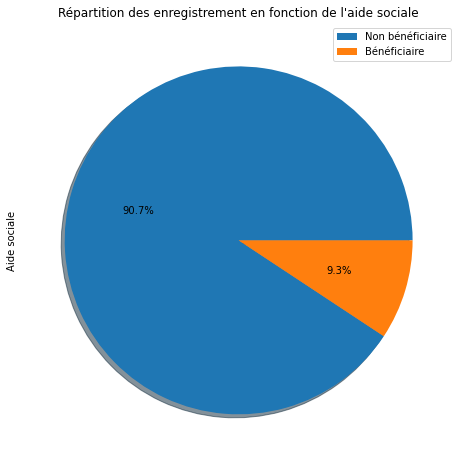

In [53]:
# Affichage des statistiques relatives au nombre de bénéficiaires de l'aide sociale
df.groupby('patient_id').max().scholarship.value_counts().plot(kind='pie',
                               figsize=(8, 8),
                               labels=['Non bénéficiaire', 'Bénéficiaire'],
                               legend=True,
                               autopct='%1.1f%%',
                               #explode=(0, 0.1),
                               labeldistance=None,
                               shadow=True);
labelGraph("Répartition des enregistrement en fonction de l'aide sociale",
          ylabel='Aide sociale')
#plt.ylabel('Aide sociale')
#plt.title('Répartition des enregistrement en fonction de l\'aide sociale');

Seulement __9.3%__ des patients enregistrés bénéficient de l'aide sociale Bolsa Famìlia.

In [54]:
# Taux d'absence aux rendez-vous en fonction de l'aide sociale
df_group = 100 * df[no_show].groupby('scholarship').no_show.count() / df.groupby('scholarship').no_show.count()
df_group.rename({0 : 'Non bénéficiaire', 1 : 'Bénéficiaire'}, inplace=True)
df_group

scholarship
Non bénéficiaire    19.682142
Bénéficiaire        23.566687
Name: no_show, dtype: float64

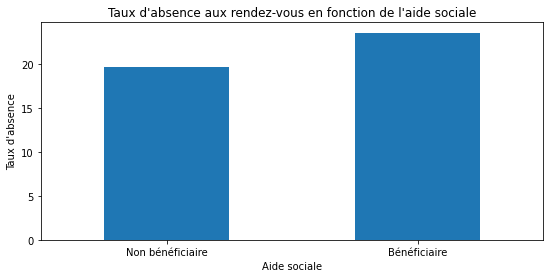

In [55]:
# Tracé du graphe y relatif
df_group.plot(kind='bar', figsize=(9, 4));
labelGraph("Taux d'absence aux rendez-vous en fonction de l'aide sociale",
          'Aide sociale',
          "Taux d'absence")
#plt.title('Taux d\'absence aux rendez-vous en fonction de l\'aide sociale');
#plt.xlabel('Aide sociale')
#plt.xticks(rotation='horizontal')
#plt.ylabel('Taux d\'absence');

Il ressort que :
- __19.68%__ des rendez-vous pris par les personnes __non bénéficiaires__ de l'aide sociale ne sont souvent pas respectés
- __23.57%__ des rendez-vous pris par les personnes __bénéficiaires__ de l'aide sociale ne sont souvent pas respectés

<a id='q4'></a>
### Les répartitions des rendez-vous médicaux dans la semaine ont-ils un impact sur les absences des patients ?

In [56]:
# Extraction du jour de la semaine à partir de la date Appointment_Day
# 0 -> Lundi
# 1 -> Mardi
# 2 -> Mercredi
# 3 -> Jeudi
# 4 -> Vendredi
# 5 -> Samedi
# 6 -> Dimanche

df['day_of_week'] = df.appointment_day.dt.dayofweek

In [57]:
df.sample()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,age_group,sick,day_of_week
98430,2.174593e+14,F,2016-05-10 12:38:47+00:00,2016-06-02 00:00:00+00:00,63,JARDIM DA PENHA,0,0,0,0,1,0,Vieux,0,3


In [58]:
# Nombre de rendez-vous en fonction des jours de la semaine

df.groupby('day_of_week').patient_id.count()

day_of_week
0    20898
1    23737
2    23790
3    16012
4    17332
5       38
Name: patient_id, dtype: int64

- Aucun rendez-vous n'est pris la journée du Dimanche
- Seulement __38__ rendez-vous ont été pris pour la journée du __samedi__. L'exploitation de cette valeur pourrait fausser les résultats, elle sera exclue de notre étude.

In [59]:
# Taux d'absence aux rendez-vous en fonction du jour de la semaine
df_group = 100 * df[no_show].groupby('day_of_week').no_show.count() / df.groupby('day_of_week').no_show.count()

# Exclusion de la journée du Samedi
df_group.drop(5, inplace=True)

# Renommage des clé pour une meilleure lecture des résultats
df_group.rename({0: 'Lundi',
                1 : 'Mardi',
                2 : 'Mercredi',
                3 : 'Jeudi',
                4 : 'Vendredi'}, inplace=True)
df_group

day_of_week
Lundi       20.729256
Mardi       19.800312
Mercredi    19.495586
Jeudi       19.241819
Vendredi    21.140088
Name: no_show, dtype: float64

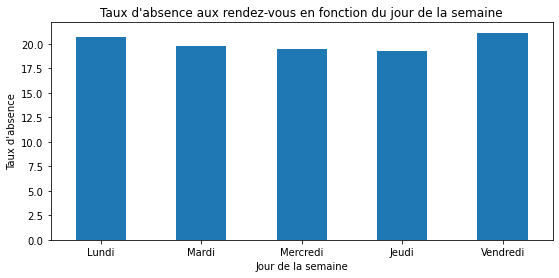

In [60]:
# Tracé du graphe y relatif

df_group.plot(kind='bar', figsize=(9, 4));
labelGraph("Taux d'absence aux rendez-vous en fonction du jour de la semaine",
          'Jour de la semaine',
          "Taux d'absence")
#plt.title('Taux d\'absence aux rendez-vous en fonction du jour de la semaine');
#plt.xlabel('Jour de la semaine')
#plt.xticks(rotation='horizontal')
#plt.ylabel('Taux d\'absence');

Il ressort que les taux d'absence aux rendez-vous médicaux sont répartis par jour de la semaine comme suit :
- __20.73%__ les __lundis__
- __19.80%__ les __mardis__
- __19.50%__ les __mercredis__
- __19.24%__ les __jeudis__
- __21.14%__ les __vendredis__

<a id='q5'></a>
### Quelles sont les principales zones géographiques où les patients sont plus susceptibles de manquer leur rendez-vous médical ?

#### Exploration du paramètre Neigbourhood

In [61]:
# Évaluation du nombre de répétitions des régions dans notre ensemble de données

df_count = df.neighbourhood.value_counts().sort_values()
df_count

PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         8
ILHA DO FRADE                    10
ILHA DO BOI                      35
                               ... 
ITARARÉ                        3226
JARDIM DA PENHA                3587
RESISTÊNCIA                    4026
MARIA ORTIZ                    5464
JARDIM CAMBURI                 6978
Name: neighbourhood, Length: 81, dtype: int64

In [62]:
# Identification des valeurs clés relatives aux différentes régions

df_count.describe()

count      81.000000
mean     1256.876543
std      1255.862526
min         1.000000
25%       373.000000
50%       800.000000
75%      1881.000000
max      6978.000000
Name: neighbourhood, dtype: float64

Nous constatons que sur les 81 zones faisant partie de notre étude, certaines sont plus répétées que d'autres.

Afin d'assainir les données avant un traitement, nous allons éliminer tous les enregistrements des régions pour lesquelles nous n'avons pas assez de données.

Nous prendrons comme référence d'élimination le 25e percentile i.e. __373__.

In [63]:
# Détermination de la liste des régions pour lesquelles le nombre total d'entrées est supérieur ou égal à 373

liste = df_count[df_count >= 373].index

In [64]:
# Taux d'absence aux rendez-vous en fonction des zones géographiques

df_group = 100 * df[no_show].groupby('neighbourhood').no_show.count() / df.groupby('neighbourhood').no_show.count()

# Filtrage de toutes les entrées (régions) pour lesquelles le nombre d'enregistrement total est supérieur ou égal à 373

df_short = df_group[liste].sort_values(ascending=False)
df_short

SANTOS DUMONT        28.511354
SANTA CECÍLIA        27.338129
SANTA CLARA          25.701944
ITARARÉ              25.604464
JESUS DE NAZARETH    24.526874
                       ...    
VILA RUBIM           16.313823
SANTA MARTHA         15.609408
DO QUADRO            15.491184
DO CABRAL            15.458015
SOLON BORGES         15.178571
Name: no_show, Length: 61, dtype: float64

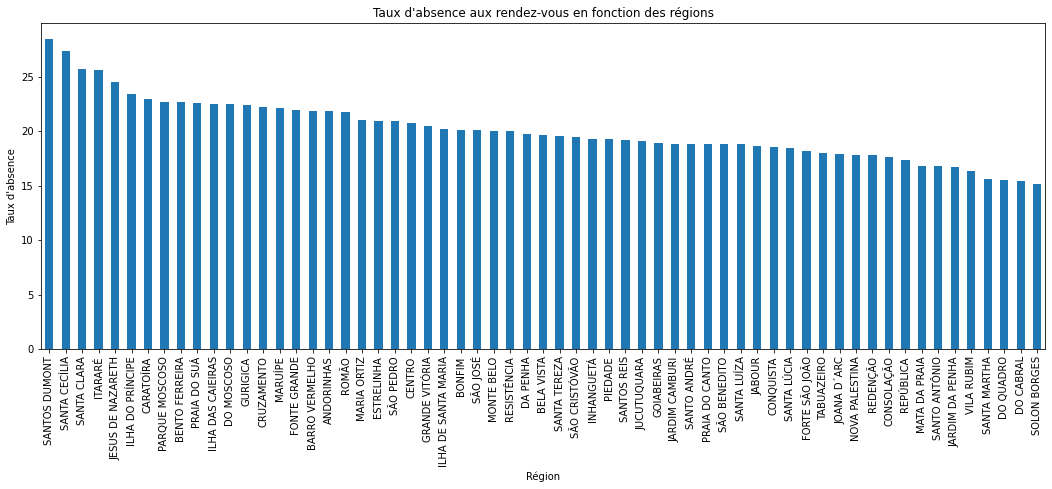

In [65]:
# Tracé du graphe y relatif 

df_short.plot(kind='bar', figsize=(18, 6));
labelGraph("Taux d'absence aux rendez-vous en fonction des régions",
          'Région',
          "Taux d'absence",
          'vertical')
#plt.title('Taux d\'absence aux rendez-vous en fonction des régions');
#plt.xlabel('Région')
#plt.ylabel('Taux d\'absence');

Il ressort les 5 principales régions dans lesquels les patients sont susceptibles de s'absenter de leur rendez-vous sont :
- __SANTOS DUMONT__ avec un taux d'absence de __28.51%__
- __SANTA CECÍLIA__ avec un taux d'absence de __27.34%__
- __SANTA CLARA__ avec un taux d'absence de __25.70%__
- __ITARARÉ__ avec un taux d'absence de __25.60%__
- __JESUS DE NAZARETH__ avec un taux d'absence de __24.53%__

<a id='conclusions'></a>
## Conclusions

### Résultats obtenus

Arrivé au terme de notre analyse nous pouvons conclure les éléments suivants concernant les paramètres des patients :
- Les vieux patients, __agés de plus de 56 ans__, ont tendance à __mieux respecter__ leurs rendez-vous médicaux. Les adultes et les plus jeunes ont un taux d'absence aux rendez-vous beaucoup plus élevé. ([↑](#q1_age))
- Les __Femmes__ ont légèrement tendance à __plus manquer__ aux rendez-vous __que les Hommes__. On ne peut pas se fier de façon objective à ce paramètre ([↑](#q1_gender))
- Les patients ne présentant __aucune pathologie__ ont tendance à __manquer plus__ de rendez-vous que les __malades__. ([↑](#q1_pathology))
- Les patients __alcooliques__ ont tendance à __manquer plus__ de rendez-vous que les __non-alcooliques__. ([↑](#q1_alcohol))

De ce fait nous pouvons retenir que, __le jeune âge des patient, l'absence de pathologies et les tendances alcooliques__ ont un __effet négatif__ sur le respect des rendez-vous médicaux. __Il est donc prévisible d'anticiper sur l'absence des patients à l'aide de ces paramètres__.

Par ailleurs :
- __L'envoi des SMS__ aux patients __n'est pas efficace__. Cela a un __effet négatif__ sur le respect des rendez-vous. Il faudrait une analyse plus détaillée pour identifier la raison exacte de cette contre performance, notre ensemble de données ne dispose pas d'assez d'informations pour cela. ([↑](#q2))
- On peut dire que les patients bénéficiant de l'aide sociale __Bolsa Famìlia ne prennent pas vraiment leur aide au serieux__. Ils ont tendance à beaucoup plus manquer à leur rendez-vous que ceux qui n'en bénéficie pas. Par ailleurs, notre ensemble de données ne permet pas d'identifier la raison exacte de leur manquement. ([↑](#q3))
- Les jours de __Lundi__ et de __Vendredi__ ont été identifiés comme ceux pendant lesquels __les patients manquent le plus__ à leurs rendez-vous. Cela est probablement dû à la reprise du boulot en début de semaine et au départ en weekend les vendredis. Toutefois, notre ensemble de données ne permet pas de tirer une conclusion là dessus. ([↑](#q4))
- Les __5 principales régions__ dans lesquelles les patients ont tendance à plus s'absenter à leurs rendez-vous sont __SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH__. ([↑](#q5))

### Limites observées

Quelques problèmes ont été observés dans notre ensemble de données pendant notre analyse :
- Plusieurs doublons ont été détectés dans la série, certains patients se sont enregistrés plusieurs fois  avec le même identifiant de patient pour une même date de rendez-vous. Ces données ont dû être éliminées avant de démarrer l'analyse. Toutefois, cela n'a pas d'impact négatif sur notre analyse.
- Le paramètre __Handicap__ n'a pas été exploité en raison de sa nature qui n'était pas compréhensible. Son inclusion aurait peut-être modifié le résultat de notre analyse sur les pathologies des patients.
- Au cours de l'analyse sur les régions, nous avons exclu toutes les régions pour lesquelles il y avait moins de 373 entrées (25e percentile) dans notre ensemble de données. La modification de cette limite pourrait faire ressortir de nouvelles régions.
- Une entrée pour laquelle un patient féminin était âgé de __-1 an__ a été supprimée. Cela pourrait correspondre à une femme enceinte et le renseignement de l'âge exact de la mère (au lieu de -1 an) aurait été plus interessant pour notre étude. 